# Comparing evaluation through detection and tracking metrics


#### Requirements
Firts you need to evaluate the outputs of the detectors and trackers with the commands:
```
python evaluation/mAP/main.py
python evaluation/scripts/run_mot_challenge.py --BENCHMARK <dataset_name> --USE_PARALLEL True --NUM_PARALLEL_CORES 4 --TRACKERS_TO_EVAL <tracker_name>
```

And generate a table with all the results. For that use the following command:
```
python evaluation/create_table.py
```

> You might need to use the `eval` environment to run the programs.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.spatial import distance

import auxiliar as aux

In [2]:
path = '../outputs/evaluation/'
file_name = 'all_metrics.csv'

tb = pd.read_csv(path + file_name, sep=",")

In [3]:
tb_20 = aux.select_dataset(tb, 'MOT20')
tb_17 = aux.select_dataset(tb, 'MOT17')

In [4]:
tb_20 = aux.select_list(tb_20, ['sort', 'deep_sort', 'sst', 'uma'], ['gt', 'public', 'faster_rcnn', 'faster_rcnn-fine-tune', 'faster_rcnn-mod-1', 'faster_rcnn-mod-2', 'faster_rcnn-mod-3', 'faster_rcnn-mod-4'])
tb_17 = aux.select_list(tb_17, ['sort', 'deep_sort', 'sst', 'uma'], ['gt', 'public', 'faster_rcnn', 'faster_rcnn-fine-tune', 'faster_rcnn-mod-1', 'faster_rcnn-mod-2', 'faster_rcnn-mod-3', 'faster_rcnn-mod-4'])
tb = aux.select_list(tb, ['sort', 'deep_sort', 'sst', 'uma'], ['gt', 'public', 'faster_rcnn', 'faster_rcnn-fine-tune', 'faster_rcnn-mod-1', 'faster_rcnn-mod-2', 'faster_rcnn-mod-3', 'faster_rcnn-mod-4'])

tb_20_sort      = aux.select_list(tb_20, ['sort'], ['gt', 'public', 'faster_rcnn', 'faster_rcnn-fine-tune', 'faster_rcnn-mod-1', 'faster_rcnn-mod-2', 'faster_rcnn-mod-3', 'faster_rcnn-mod-4'])
tb_20_deep_sort = aux.select_list(tb_20, ['deep_sort'], ['gt', 'public', 'faster_rcnn', 'faster_rcnn-fine-tune', 'faster_rcnn-mod-1', 'faster_rcnn-mod-2', 'faster_rcnn-mod-3', 'faster_rcnn-mod-4'])
tb_20_sst       = aux.select_list(tb_20, ['sst'], ['gt', 'public', 'faster_rcnn', 'faster_rcnn-fine-tune', 'faster_rcnn-mod-1', 'faster_rcnn-mod-2', 'faster_rcnn-mod-3', 'faster_rcnn-mod-4'])
tb_20_uma       = aux.select_list(tb_20, ['uma'], ['gt', 'public', 'faster_rcnn', 'faster_rcnn-fine-tune', 'faster_rcnn-mod-1', 'faster_rcnn-mod-2', 'faster_rcnn-mod-3', 'faster_rcnn-mod-4'])

tb_17_sort      = aux.select_list(tb_17, ['sort'], ['gt', 'public', 'faster_rcnn', 'faster_rcnn-fine-tune', 'faster_rcnn-mod-1', 'faster_rcnn-mod-2', 'faster_rcnn-mod-3', 'faster_rcnn-mod-4'])
tb_17_deep_sort = aux.select_list(tb_17, ['deep_sort'], ['gt', 'public', 'faster_rcnn', 'faster_rcnn-fine-tune', 'faster_rcnn-mod-1', 'faster_rcnn-mod-2', 'faster_rcnn-mod-3', 'faster_rcnn-mod-4'])
tb_17_sst       = aux.select_list(tb_17, ['sst'], ['gt', 'public', 'faster_rcnn', 'faster_rcnn-fine-tune', 'faster_rcnn-mod-1', 'faster_rcnn-mod-2', 'faster_rcnn-mod-3', 'faster_rcnn-mod-4'])
tb_17_uma       = aux.select_list(tb_17, ['uma'], ['gt', 'public', 'faster_rcnn', 'faster_rcnn-fine-tune', 'faster_rcnn-mod-1', 'faster_rcnn-mod-2', 'faster_rcnn-mod-3', 'faster_rcnn-mod-4'])


## Detectors evaluation

Basic evaluation information of the detectors used.

In [6]:
tb_20_sort.groupby('Detector').mean()

,mAP,Precision,Recall,TP,FP,GT detections,FN,HOTA(0),LocA(0),HOTALocA(0),...,GT_IDs,S,Sf,Qd,Qt,Y,Nd,Nt,Id,It
Detector,,,,,,,,,,,,,,,,,,,,,
faster_rcnn,50.014541,74.071830,53.425707,143924.00,33218.00,318609.75,174685.75,0.385168,0.669104,0.255475,...,553.75,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
faster_rcnn-fine-tune,69.750049,80.669018,70.767616,179473.50,23403.00,318609.75,139136.25,0.400142,0.780929,0.311026,...,553.75,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
faster_rcnn-mod-1,31.869323,75.665106,33.146615,97518.50,23601.50,318609.75,221091.25,0.205523,0.683618,0.140219,...,553.75,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
faster_rcnn-mod-2,42.985582,87.967776,44.685280,122450.25,13676.50,318609.75,196159.50,0.349791,0.709164,0.248094,...,553.75,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
faster_rcnn-mod-3,19.978839,76.247346,22.652875,47128.50,12696.50,318609.75,271481.25,0.130403,0.744163,0.097205,...,553.75,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
faster_rcnn-mod-4,5.947220,99.567044,5.970576,8111.25,58.75,318609.75,310498.50,0.078393,0.807986,0.064383,...,553.75,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
gt,100.000000,100.000000,100.000000,318609.75,0.00,318609.75,0.00,0.994169,0.979074,0.973365,...,553.75,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
public,52.575443,99.300485,52.837978,164085.00,1200.75,318609.75,154524.75,0.400296,0.886560,0.355866,...,553.75,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


In [5]:
tb_17_sort.groupby('Detector').mean()

,mAP,Precision,Recall,TP,FP,GT detections,FN,HOTA(0),LocA(0),HOTALocA(0),...,GT_IDs,S,Sf,Qd,Qt,Y,Nd,Nt,Id,It
Detector,,,,,,,,,,,,,,,,,,,,,
faster_rcnn,60.607164,32.746377,68.942208,13500.571429,23330.000000,20997.0,7496.428571,0.412000,0.672423,0.279810,...,78.0,0.535714,0.434286,0.551429,0.648571,0.101429,0.505714,0.737143,0.597143,0.564286
faster_rcnn-fine-tune,75.201363,32.880830,81.686811,16220.000000,28605.428571,20997.0,4777.000000,0.368528,0.698508,0.260136,...,78.0,0.530000,0.457143,0.542857,0.615714,0.075714,0.387143,0.564286,0.697143,0.667143
faster_rcnn-mod-1,41.869426,32.969989,45.718327,9098.142857,15197.428571,20997.0,11898.857143,0.322796,0.658551,0.212962,...,78.0,0.474286,0.414286,0.524286,0.584286,0.060000,0.582857,0.700000,0.465714,0.468571
faster_rcnn-mod-2,55.669865,66.893877,59.354641,11186.571429,4731.857143,20997.0,9810.428571,0.498595,0.730611,0.365981,...,78.0,0.462857,0.478571,0.691429,0.674286,-0.017143,0.772857,0.691429,0.611429,0.661429
faster_rcnn-mod-3,42.699252,57.271248,49.243894,8374.285714,5522.285714,20997.0,12622.714286,0.233249,0.743157,0.173181,...,78.0,0.428571,0.447143,0.630000,0.614286,-0.018571,0.668571,0.537143,0.592857,0.688571
faster_rcnn-mod-4,30.366657,96.685175,30.940537,4454.142857,173.142857,20997.0,16542.857143,0.328937,0.813453,0.268191,...,78.0,0.478571,0.498571,0.580000,0.562857,-0.018571,0.338571,0.297143,0.822857,0.827143
gt,100.000000,100.000000,100.000000,20997.000000,0.000000,20997.0,0.000000,0.908861,0.949629,0.863610,...,78.0,0.465714,0.500000,1.000000,0.965714,-0.034286,1.000000,0.978571,1.000000,0.952857
public,47.279869,93.470599,47.465455,9127.857143,534.857143,20997.0,11869.142857,0.485636,0.857514,0.416808,...,78.0,0.477143,0.495714,0.677143,0.662857,-0.015714,0.517143,0.462857,0.838571,0.858571


## Comparing detector and tracker outputs

Each detector and tracker applies different and various techniques to do their work. In this section we study the associative between trackers ussing different detectors outputs and the same ones.

In [8]:
aux.search(tb, 'uma', 'gt')

,Tracker,Detector,Dataset name,Set id,mAP,Precision,Recall,TP,FP,GT detections,...,GT_IDs,S,Sf,Qd,Qt,Y,Nd,Nt,Id,It
24,uma,gt,MOT20,MOT20-01,100.0,100.0,100.0,22444,0,22444,...,74,-1.00,-1.00,-1.0,-1.00,-1.00,-1.0,-1.00,-1.0,-1.00
25,uma,gt,MOT20,MOT20-02,100.0,100.0,100.0,169891,0,169891,...,270,-1.00,-1.00,-1.0,-1.00,-1.00,-1.0,-1.00,-1.0,-1.00
26,uma,gt,MOT20,MOT20-03,100.0,100.0,100.0,337404,0,337404,...,702,-1.00,-1.00,-1.0,-1.00,-1.00,-1.0,-1.00,-1.0,-1.00
27,uma,gt,MOT20,MOT20-05,100.0,100.0,100.0,744700,0,744700,...,1169,-1.00,-1.00,-1.0,-1.00,-1.00,-1.0,-1.00,-1.0,-1.00
209,uma,gt,MOT17,MOT17-02,100.0,100.0,100.0,26960,0,26960,...,62,0.38,0.48,1.0,0.90,-0.10,1.0,0.95,1.0,0.86
210,uma,gt,MOT17,MOT17-04,100.0,100.0,100.0,66005,0,66005,...,83,0.42,0.50,1.0,0.92,-0.08,1.0,0.94,1.0,0.90
211,uma,gt,MOT17,MOT17-05,100.0,100.0,100.0,7754,0,7754,...,133,0.39,0.49,1.0,0.90,-0.10,1.0,0.93,1.0,0.87
212,uma,gt,MOT17,MOT17-09,100.0,100.0,100.0,5839,0,5839,...,26,0.39,0.49,1.0,0.91,-0.09,1.0,0.94,1.0,0.87
213,uma,gt,MOT17,MOT17-10,100.0,100.0,100.0,14240,0,14240,...,57,0.41,0.49,1.0,0.92,-0.08,1.0,0.97,1.0,0.86
214,uma,gt,MOT17,MOT17-11,100.0,100.0,100.0,9518,0,9518,...,75,0.41,0.50,1.0,0.91,-0.09,1.0,0.96,1.0,0.86


## Comparing metrics

Metrics are used to score detectors and trackers, while deciding which ones perform better in the given scenarios. In this section we want to study the correlation between metrics and see if there is any case where the metrics are similar.

As we can see in the matrix of results there are some interesting results we want to discuss.

In detection metrics, *mAP* and *Recall* are high correlated.
 - precision and recall mostly opposite.
 - Precision and FP are opposite -> following the precision formula it has sense.
 - Recall and mAP are opposite of FN -> With the formula it has sense.
 
Tracking metrics:
 - HOTA and IDF1 are very similar. ATA is also similar to both.
 - MOTP is more similar to ATA than to MOTA.
 - MOTA is the opposite of IDSW -> ????

Mixed:
 - IDSW is similar to FP.
 - HOTA has a direct relation with mAP.
 - MOTA has a direct relation with Precision.

# Correlation matix wil ALL

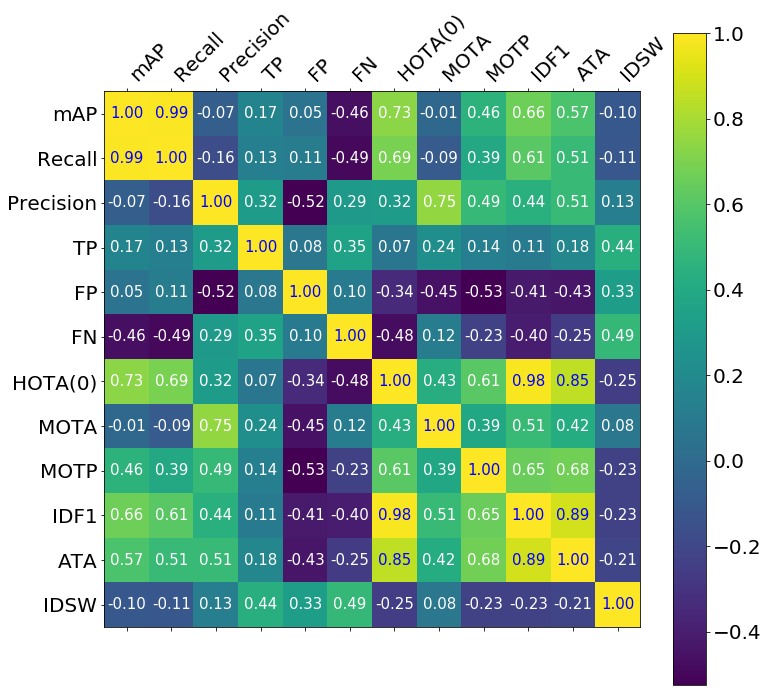

In [9]:
metrics = ['mAP', 'Recall', 'Precision', 'TP', 'FP', 'FN', 'HOTA(0)', 'MOTA', 'MOTP', 'IDF1', 'ATA', 'IDSW']
result_m = aux.correlation_metrics(tb, metrics)

aux.plot_matrix(result_m, metrics)

# MOT17

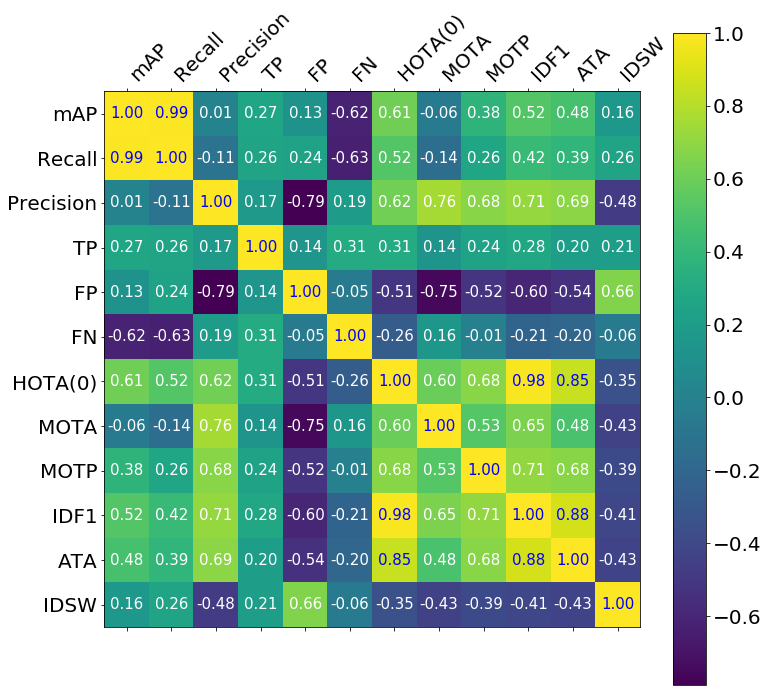

In [10]:
result_m = aux.correlation_metrics(tb_17, metrics)

aux.plot_matrix(result_m, metrics)

### Matrix for each tracker (MOT17)

SORT


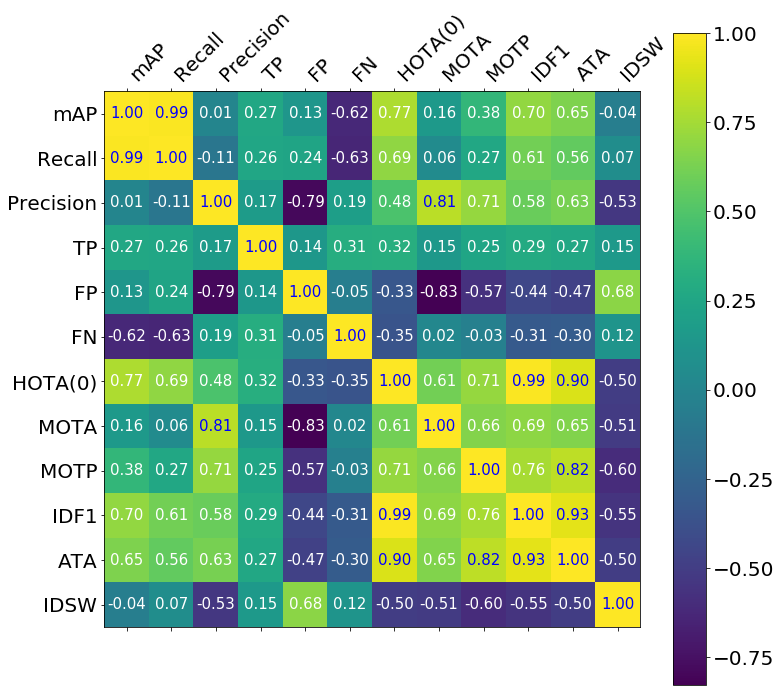

DEEP_SORT


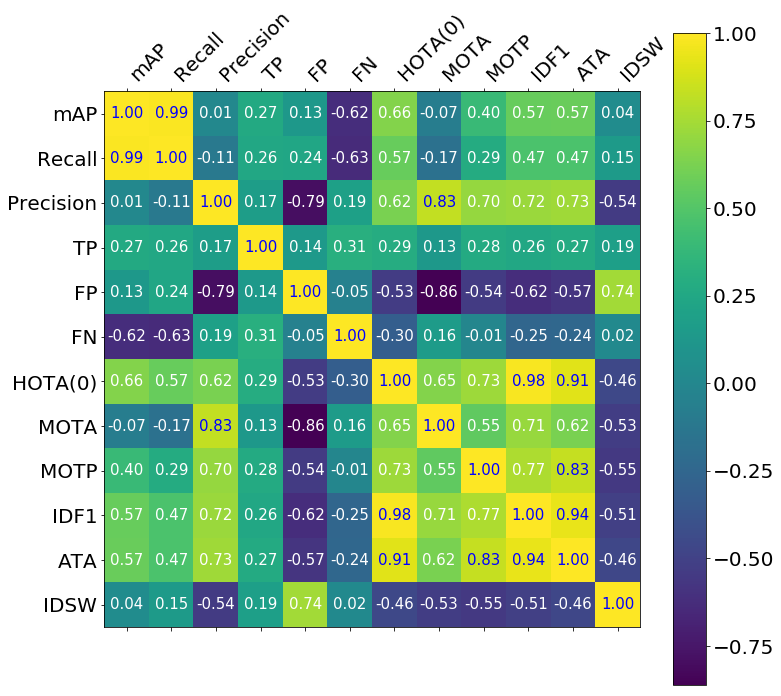

SST


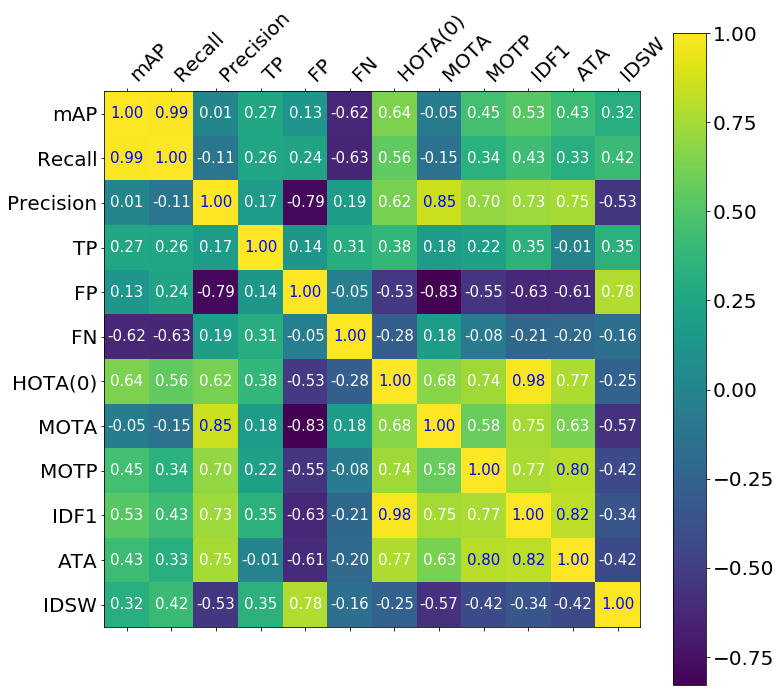

UMA


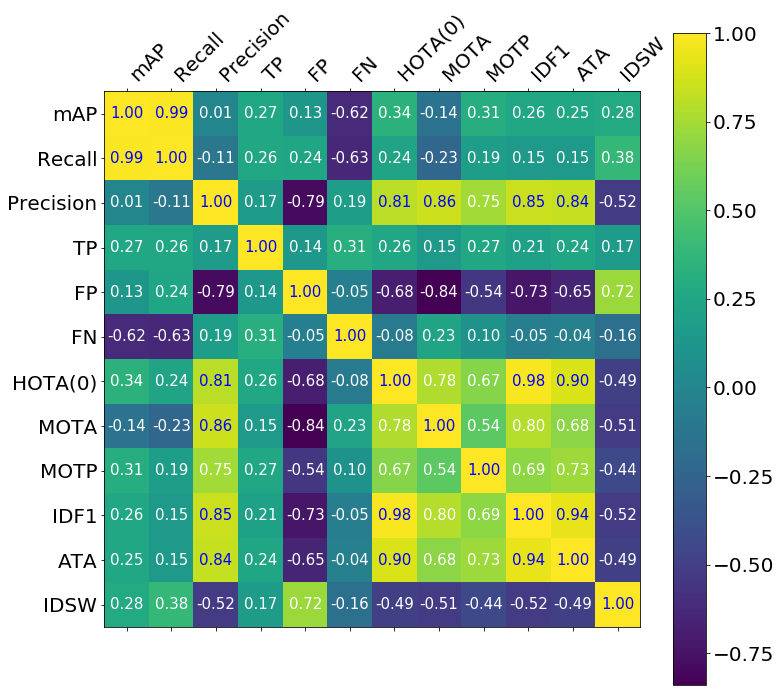

In [11]:
for trk in tb_17['Tracker'].unique():
    
    tb_search = aux.search(tb_17, trk)
    result_m = aux.correlation_metrics(tb_search, metrics)
    
    print(trk.upper())

    aux.plot_matrix(result_m, metrics)

# MOT20

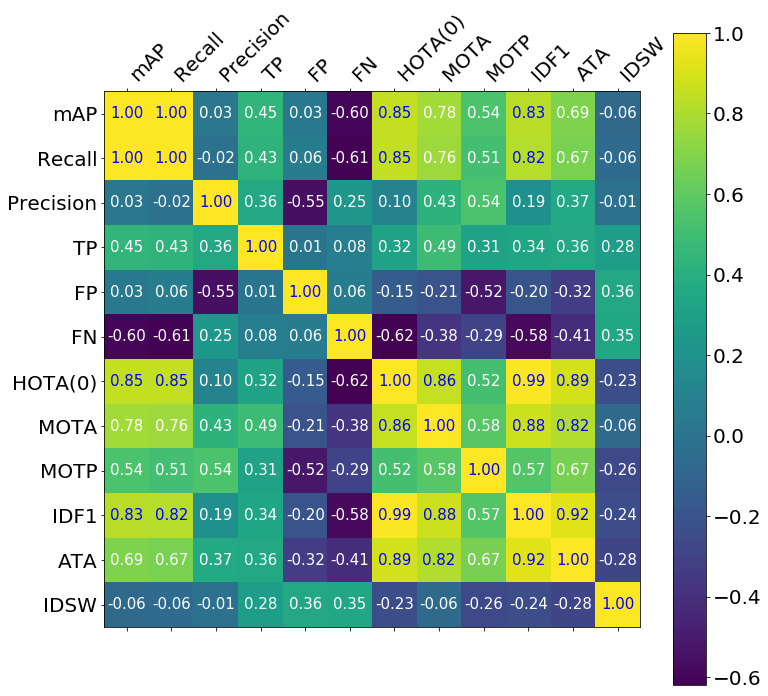

In [12]:
result_m = aux.correlation_metrics(tb_20, metrics)

aux.plot_matrix(result_m, metrics)

### Matrix for each tracker (MOT20)

SORT


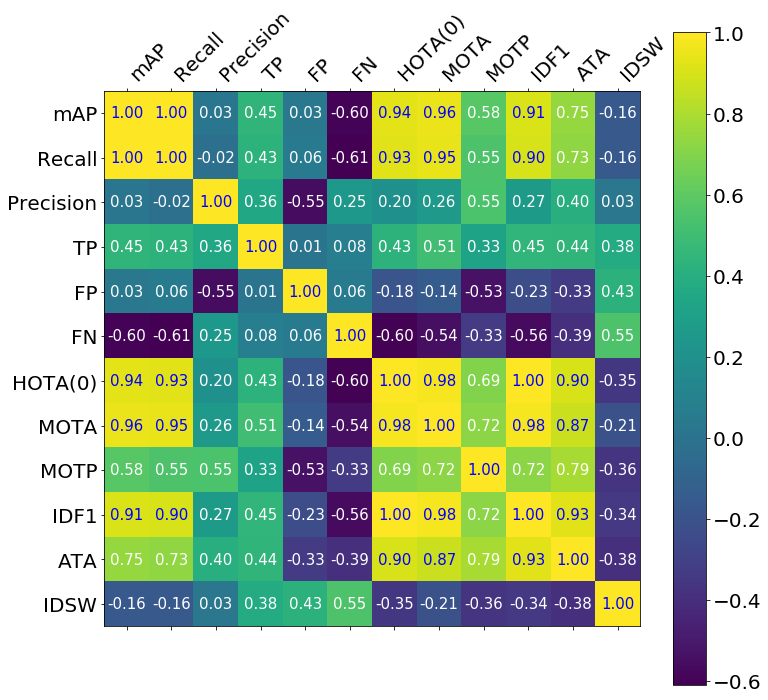

DEEP_SORT


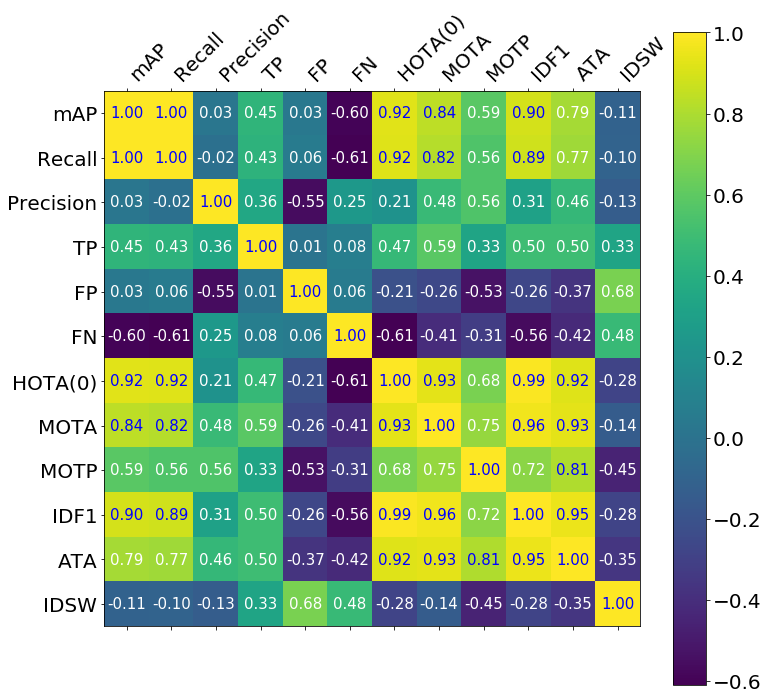

SST


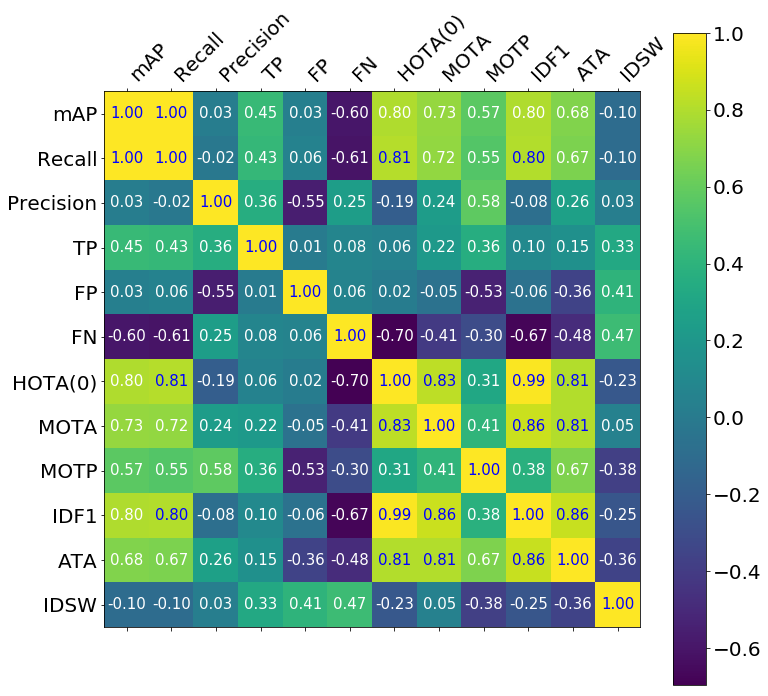

UMA


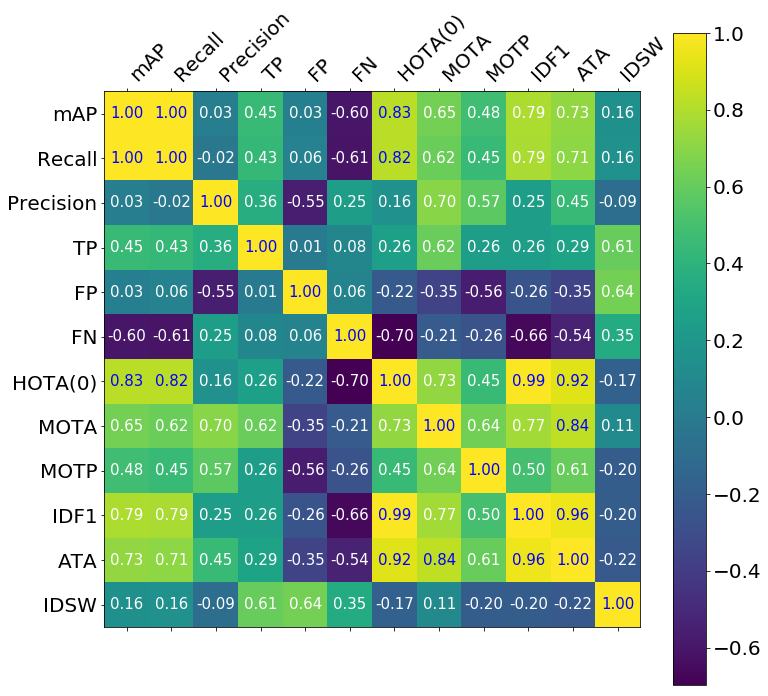

In [13]:
for trk in tb_20['Tracker'].unique():
    
    tb_search = aux.search(tb_20, trk)
    result_m = aux.correlation_metrics(tb_search, metrics)
    
    print(trk.upper())

    aux.plot_matrix(result_m, metrics)

# New metric experiments

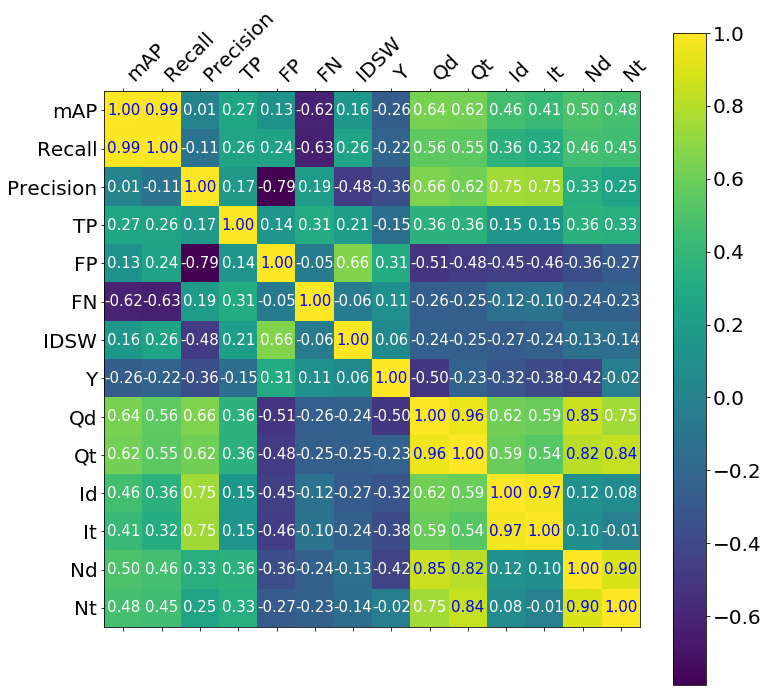

In [14]:
metrics = ['mAP', 'Recall', 'Precision', 'TP', 'FP', 'FN', 'IDSW', 'Y', 'Qd', 'Qt', 'Id', 'It', 'Nd', 'Nt']
result_m = aux.correlation_metrics(tb_17, metrics)

aux.plot_matrix(result_m, metrics)

## Matrix with more metrics

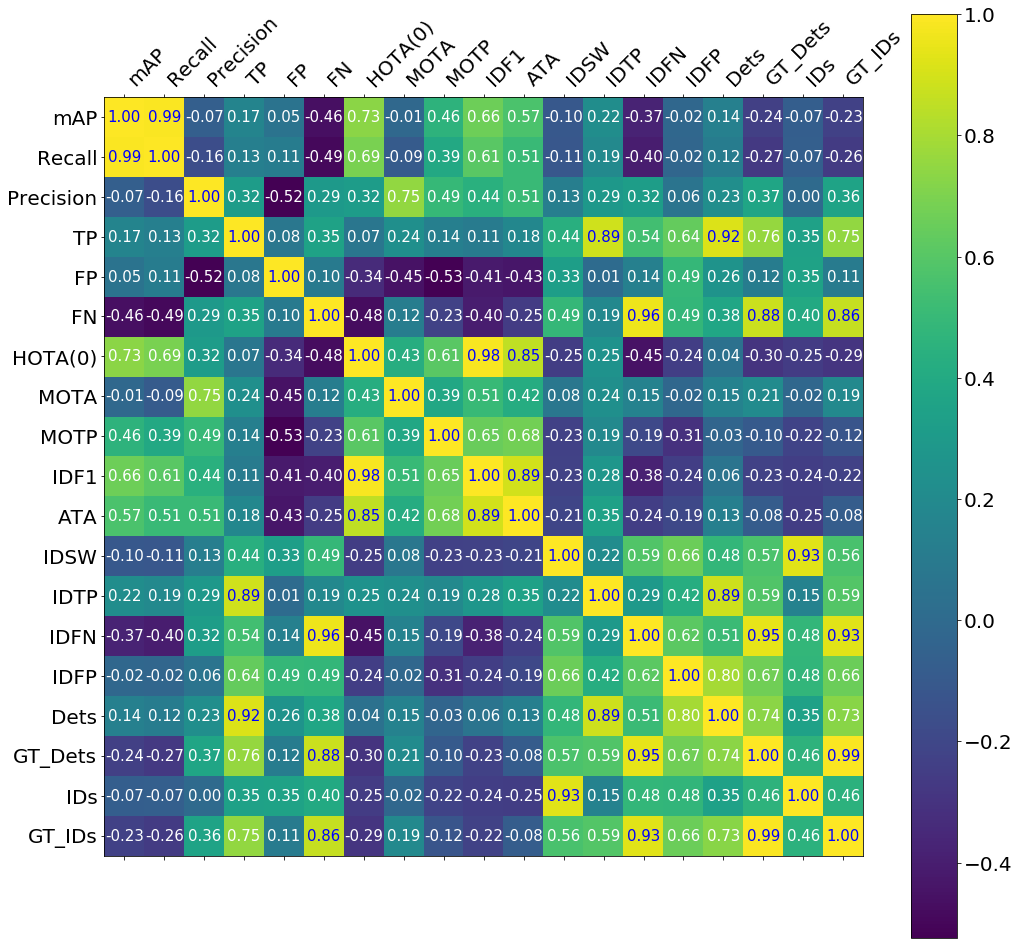

In [15]:
metrics = ['mAP', 'Recall', 'Precision', 'TP', 'FP', 'FN', 'HOTA(0)', 'MOTA', 'MOTP', 'IDF1', 'ATA', 'IDSW', 'IDTP', 'IDFN', 'IDFP', 'Dets', 'GT_Dets', 'IDs', 'GT_IDs']
result_m = aux.correlation_metrics(tb, metrics)

aux.plot_matrix(result_m, metrics, figsize=(17, 17))